# Introducción

## Objetivo general
El proyecto consiste en predecir la deserción de estudiantes en el contexto una plataforma educativa online de código libre argentina que presenta una secuencia didáctica para aprender a programar. Para ello se utilizará un dataset anonimizado de aproximadamente 50.000 filas con progreso de estudiantes consistente en sus interacciones con la plataforma de aproximadamente 150 estudiantes. El mismo contiene tanto datos estructurados como no estructurados: tipos de eventos, fechas, transiciones entre estados, código fuente de soluciones enviadas, resultados de análisis sobre los árboles sintacticos y la ejecución del código fuente, entre otros.

## Primera entrega: análisis y visualización

## Hitos

La intención es avanzar de forma iterativa e incremental, en cuatro iteraciones: 

1. **Familiarización y planteo de preguntas** (📅 semana del 10 de Mayo) Conoceremos el problema, caracterizaremos a muy alto nivel el dataset y  partiendo de la pregunta _¿qué factores inciden en la deserción?_ se deberá:
    1. producir nuevas preguntas, más específicas, que ayuden a responder a la pregunta general;
    2. proponer a alto nivel (no es necesario en este punto código, aunque siempre suma) estrategias para resolverlas;
    3. identificar, si fuera necesario, qué información falta para responder dichas preguntas
2. **Caracterización y visualización I** (📅 semana del 17 de Mayo). Intentaremos dar respuesta a las preguntas de la iteración anterior a través de métricas estadísticas y visualizaciones. Plantearemos nuevas preguntas y refinaremos las anteriores
3. **Caracterización y visualización II** (📅 semana del 24 de Mayo). Continuaremos iterando sobre las preguntas, métricas estadísticas y visualizaciones. **Este hito será opcional y en función del detalle alcanzado en el anterior**.  
4. **Entrega final** (📅 semana del 31 de Mayo)

## Los datos

Cada fila de este datasets representa el envío de una solución a un ejercicio realizada por un@ estudiante y los resultados de la evaluación automática realizada por la plataforma [Mumuki](https://mumuki.io). Encontraremos las siguientes columnas: 

  * `exercise_name` y `exercise_eid`: nombre e identificador del ejercicio dentro de una guía 
  * `expectation_results`: resultados del análisis de expectativas y code smells realizado mediante  la herramienta mulang
  * `guide_slug`: identificador único de la guía, que permite buscarle como un repositorio Github o dentro del API de contenido de Mumuki (por ejemplo la guía `mumukiproject/mumuki-guia-python-funciones-tipos-de-datos` se corresponde con la URL https://bibliotheca-api.mumuki.io/guides/mumukiproject/mumuki-guia-python-funciones-tipos-de-datos). Junto con el exercise_id constituyen la clave natural primaria del ejercicio. 
  * `result`: resutlado obtenido al intentar cargar la solución en un intérprete de Python. Sólo está presente en caso de que la solución no se haya podido cargar satisfactoriamiente debido a errores de sintaxis o referencias. Si la solución ha sido cargada correctamente, se deberá inspeccionar el campo `test_results`
  * `sid`: identificador único del envío, o -1 si lo que se envío fue una prueba a través del REPL de Mumuki (consola) en lugar de una solución
  * `student_uid`: identificador (anonimizado) de estudiante
  * `submission_content`: código fuente de la solución enviada
  * `submission_created_at`: fecha y hora GMT a la que la solución fue enviada
  * `submission_status`: estado del envío: passed (solución correcta), passed_with_warnigns (solución correcta desde el punto de vista de las pruebas unitarias pero con errores de mulang), failed (solución que no pasa las pruebas unitarias), errored (solución que no puede ser cargada por errores de sintaxis o referencias), aborted (solución que puede ser cargada pero no puede ser ejecutada de forma completa)
  * `submissions_count`: cantidad de soluciones enviadas hasta el momento para es@ estudiante y ejercicio
  * `test_results`: resultados de las pruebas unitarias, en caso de que hayan podido ser ejecutadas

In [6]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import time
import datetime as dt
from IPython.display import HTML, display
import math

seaborn.set_context('talk')



In [7]:
url= 'https://raw.githubusercontent.com/Natali-PP/diplodatos2021/main/mentoria/python_submissions.csv'
df_mumuki = pd.read_csv(url)

In [8]:
df_mumuki[:3]

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results
0,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
1,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1,77,def mitad(numero):\r\n return numero / 2,2019-09-04 01:29:22.351,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
2,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2,78,def Mitas(numero):\r\n return 2 / numero\r\n,2019-09-04 02:53:01.099,failed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail..."


*Identificamos los tipos de datos*

In [64]:
df_mumuki.dtypes

exercise_eid               int64
exercise_name             object
expectation_results       object
feedback                 float64
guide_slug                object
result                    object
sid                        int64
student_uid                int64
submission_content        object
submission_created_at     object
submission_status         object
submissions_count          int64
test_results              object
date                      object
Year                       int64
Month                      int64
DayNameWeek               object
dtype: object

*Analisis de los datos por columna*

In [65]:
df_mumuki.describe(include='all')

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,date,Year,Month,DayNameWeek
count,47183.000000,47183,47183,0.0,47183,15602,47183.000000,47183.000000,41459,47183,47183,47183.000000,41663,47183,47183.000000,47183.000000,47183
unique,NaN,46,337,NaN,3,9181,NaN,NaN,32937,47175,6,NaN,2780,198,NaN,NaN,7
top,NaN,"Palabras, sólo palabras",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,"File ""solucion.py"", line 11\n else:\n ...",NaN,NaN,0:3:4,2020-07-15 01:48:08.650,failed,NaN,[],2020-05-26,NaN,NaN,Monday
freq,NaN,2610,30332,NaN,23961,78,NaN,NaN,252,2,17609,NaN,15605,2383,NaN,NaN,11194
mean,8.589450,NaN,NaN,NaN,NaN,NaN,18412.829155,221.765000,NaN,NaN,NaN,6.763538,NaN,NaN,2019.838628,7.544264,NaN
std,4.897098,NaN,NaN,NaN,NaN,NaN,13146.120096,74.852459,NaN,NaN,NaN,11.002089,NaN,NaN,0.367877,2.050212,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,2019.000000,5.000000,NaN
25%,4.000000,NaN,NaN,NaN,NaN,NaN,6287.500000,161.000000,NaN,NaN,NaN,0.000000,NaN,NaN,2020.000000,5.000000,NaN
50%,8.000000,NaN,NaN,NaN,NaN,NaN,18092.000000,223.000000,NaN,NaN,NaN,3.000000,NaN,NaN,2020.000000,9.000000,NaN
75%,13.000000,NaN,NaN,NaN,NaN,NaN,29895.500000,284.000000,NaN,NaN,NaN,8.000000,NaN,NaN,2020.000000,9.000000,NaN


*Vemos si existen correlaciones entre variables. De existir variables correlacionadas, podemos descartarlas*

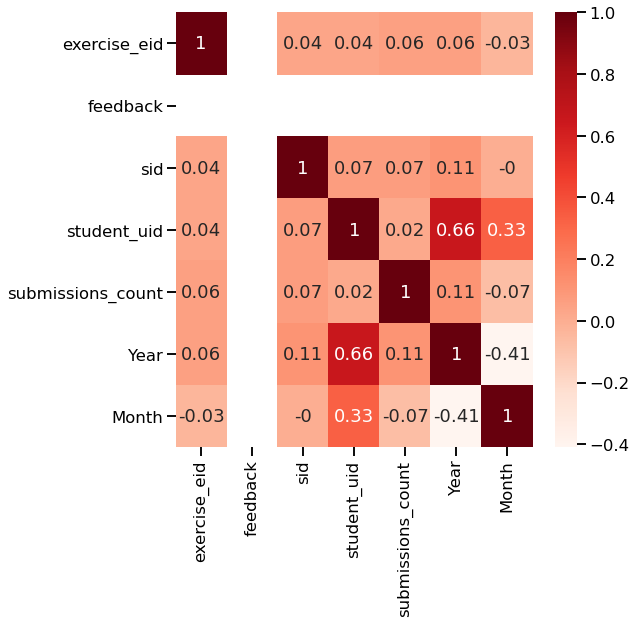

In [71]:
correlations = df_mumuki.corr().round(2)

#Using Pearson Correlation
plt.figure(figsize=(8,8))

seaborn.heatmap(correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

## Caracterización

Estas son algunas preguntas que pueden ayudarnos a entrar al lote de datos y caracterizarlo: 

* ¿Qué tamaño tiene?
* ¿Qué valores únicos hay en cada columna?
* ¿Durante qué período se enviaron las soluciones? ¿En qué dias de la semana?
* ¿Cómo son las soluciones? ¿Cuántas soluciones únicas hay?
* ¿Cuántos ejercicios únicos tenemos?

In [12]:
print(f"El tamaño del lote de datos es: {df_mumuki.shape} (registros y columnas)")

El tamaño del lote de datos es: (47183, 13) (registros y columnas)


In [5]:
len(df_mumuki['exercise_eid'].value_counts())

(47183, 13)

In [31]:
print(f"Hay {len(df_mumuki['exercise_eid'].value_counts())} valores unicos en exercise_eid")
print(f"Hay {len(df_mumuki['exercise_name'].value_counts())} valores unicos en exercise_name")

Hay 19 valores unicos en `exercise_eid`
Hay 46 valores unicos en `exercise_name`


In [20]:
df_mumuki['exercise_name'].unique()

array(['Funciones, declaración', 'Funciones, uso', 'Los premios',
       '¿Es par?', 'Libros de la buena memoria', 'Tipos de datos',
       'Booleanos', 'Más booleanos', 'El retorno del booleano',
       'Haciendo cuentas', 'Calefones', '¿Y qué tal si...?',
       '¿De qué signo sos?', 'Palabras, sólo palabras',
       'Operando strings', '¡GRITAR!', 'Probando funciones',
       'Poniendo topes', 'No tan distintos', 'Datos de todo tipo',
       'Comprando Hardware', '¿Me conviene?', 'Triangulos', 'Cuadrados',
       '¿Está afinado?', 'Cartelitos', 'Más Cartelitos',
       'Cartelitos óptimos', 'Cara o ceca', '¡Envido!',
       '¡Quiero retruco!', '¡Quiero vale cuatro!', '¿Está cerca?',
       '¿Y el program?', 'El círculo de la vida', 'Volviéndonos ricos',
       'Variables globales', '¿Y los procedimientos?', '¿Y el tablero?',
       'Impresión por pantalla', 'Martin Fierro', 'Conversiones',
       '¿Y esto cuánto vale?', 'PIenso que así es más fácil',
       'Pienso que así es más fá

In [22]:
print(f"Hay {len(df_mumuki['expectation_results'].value_counts())} valores unicos en expectation_results")
print(f"Hay {len(df_mumuki['feedback'].value_counts())} valores unicos en feedback")
print(f"Hay {len(df_mumuki['guide_slug'].value_counts())} valores unicos en guide_slug")

Hay 337 valores unicos en expectation_results
Hay 0 valores unicos en feedback
Hay 3 valores unicos en guide_slug


In [23]:
df_mumuki['guide_slug'].unique()

array(['mumukiproject/mumuki-guia-python-funciones-tipos-de-datos',
       'mumukiproject/mumuki-guia-python-practica-funciones-y-tipos-de-datos',
       'mumukiproject/mumuki-guia-python-variables-y-procedimientos'],
      dtype=object)

In [25]:
print(f"Hay {len(df_mumuki['result'].value_counts())} valores unicos en result")
print(f"Hay {len(df_mumuki['sid'].value_counts())} valores unicos en sid")
print(f"Hay {len(df_mumuki['student_uid'].value_counts())} valores unicos en student_uid")
print(f"Hay {len(df_mumuki['submission_content'].value_counts())} valores unicos en submission_content")
print(f"Hay {len(df_mumuki['submission_created_at'].value_counts())} valores unicos en submission_created_at")
print(f"Hay {len(df_mumuki['submission_status'].value_counts())} valores unicos en submission_status")

Hay 9181 valores unicos en result
Hay 41676 valores unicos en sid
Hay 286 valores unicos en student_uid
Hay 32937 valores unicos en submission_content
Hay 47175 valores unicos en submission_created_at
Hay 6 valores unicos en submission_status
Hay 145 valores unicos en submissions_count
Hay 2780 valores unicos en test_results


In [26]:
df_mumuki['submission_status'].unique()

array(['passed', 'failed', 'errored', 'passed_with_warnings', 'pending',
       'aborted'], dtype=object)

In [15]:
print(f"Hay {len(df_mumuki['submissions_count'].value_counts())} valores unicos en submissions_count")
print(f"Hay {len(df_mumuki['test_results'].value_counts())} valores unicos en test_results")

In [28]:
print(f"El período que se enviaron las soluciones es desde: {df_mumuki['submission_created_at'].min()}  hasta: {df_mumuki['submission_created_at'].max()}")

El período que se enviaron las soluciones es desde: 2019-08-30 13:17:17.700  hasta: 2020-11-23 21:52:17.944


In [29]:
df_mumuki['Date']= pd.to_datetime(df_mumuki['submission_created_at']).dt.date

<AxesSubplot:xlabel='date', ylabel='Count'>

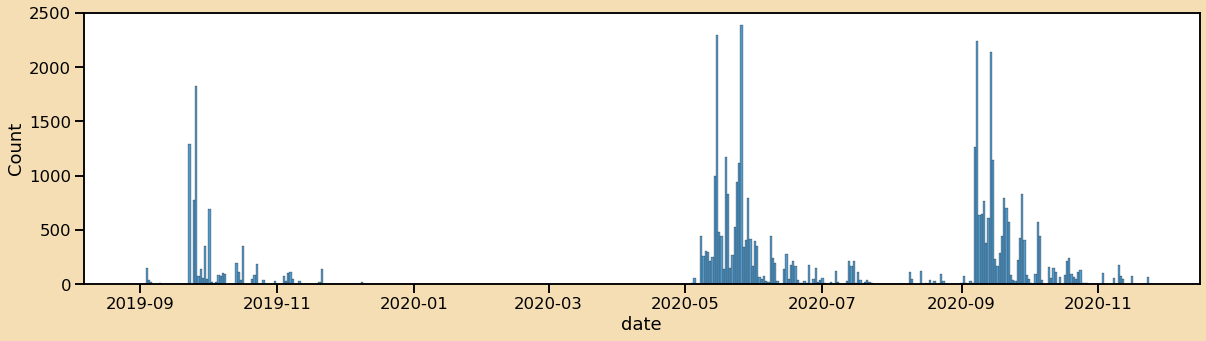

In [30]:
matplotlib.pyplot.figure(figsize = [20, 5] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
seaborn.histplot(data=df_mumuki, x=df_mumuki['Date'])

Podemos observar que los ejercicios los ejercicios realizados por los estudiantes se da en 3 periodos principales:
* 2019-10 al 2019-12
* 2020-05 al 2020-07
* 2020-09 al 2020-11

Hay un periodo de principio de enero 2020 a abril 2020 sin información.

In [32]:
df_mumuki['Year'] = pd.DatetimeIndex(df_mumuki['submission_created_at']).year
df_mumuki['Month'] = pd.DatetimeIndex(df_mumuki['submission_created_at']).month

In [35]:
df_mumuki.groupby(['Year','Month']).agg({'exercise_eid':'count'})

exercise_eid
Year Month              
2019 8                 2
     9              4746
     10             2263
     11              580
     12               23
2020 5             15732
     6              3507
     7              1126
     8               494
     9             15305
     10             2791
     11              614

In [37]:
df_mumuki['DayNameWeek'] =pd.to_datetime(df_mumuki['submission_created_at']).dt.day_name()

<AxesSubplot:xlabel='DayNameWeek', ylabel='Count'>

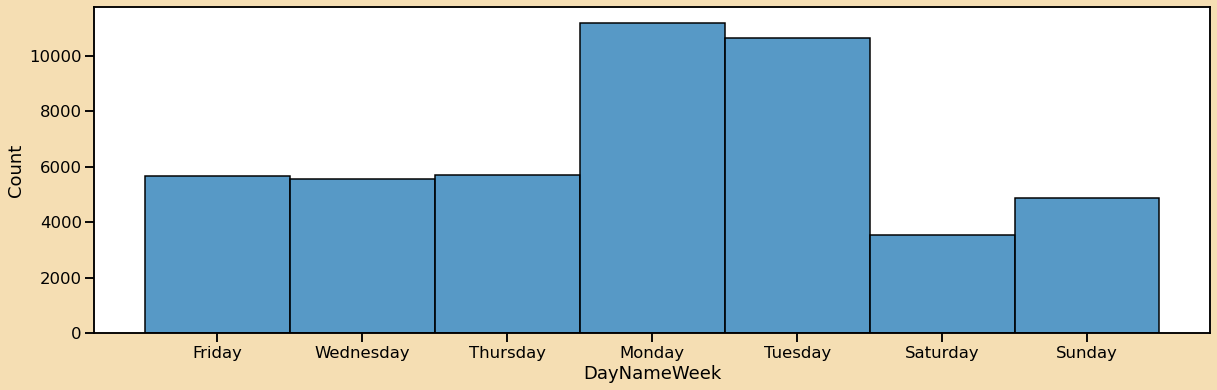

In [45]:
matplotlib.pyplot.figure(figsize = [20, 6] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
seaborn.histplot(data=df_mumuki, x=df_mumuki['DayNameWeek'])

*El día de la semana que más ejercicios presenta es el Lunes y Martes. El Sabado es el día de la semana que menos ejercicios presentan.*

In [ ]:
#¿Cómo son las soluciones? ¿Cuántas soluciones únicas hay?

In [46]:
print(f"Hay {len(df_mumuki['exercise_name'].value_counts())} valores unicos en exercise_name")

Hay 46 valores unicos en exercise_name


In [73]:
#matplotlib.pyplot.figure(figsize = [15, 10] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
#ax= seaborn.barplot(y=df_mumuki['exercise_name'].value_counts(), x=df_mumuki['exercise_name'].value_counts().index, data=df_mumuki)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

*Identificamos las columnas que tienen faltantes de datos y las mangintudes de los faltantes*

In [72]:
df_mumuki.isna().sum()

exercise_eid                 0
exercise_name                0
expectation_results          0
feedback                 47183
guide_slug                   0
result                   31581
sid                          0
student_uid                  0
submission_content        5724
submission_created_at        0
submission_status            0
submissions_count            0
test_results              5520
date                         0
Year                         0
Month                        0
DayNameWeek                  0
dtype: int64

*Detectamos que no hay identificador ni nombre de ejercicos nulos.
 Detectamos que no hay identificador de estudiantes nulos.
 Los campos result, submission_content y test_results de acuerdo al significado puede darse que vengan nulos.
 Los campos de la columna Feedback no tiene datos, esta todos nulos, por la cual decidimos eliminarlo.*

*En la descripción de formulas por columnas detectamos que tenemos identificado a un estudiante con id -1.*

In [78]:
df_mumuki_uid1=df_mumuki[df_mumuki["student_uid"]==-1]

In [88]:
df_mumuki_uid1.groupby(['guide_slug','exercise_name']).agg({'sid':'count','date':'max'})

sid  \
guide_slug                                         exercise_name                     
mumukiproject/mumuki-guia-python-funciones-tipo... Booleanos                     2   
                                                   Datos de todo tipo            1   
                                                   El retorno del booleano       1   
                                                   Funciones, declaración        3   
                                                   Funciones, uso                2   
                                                   Haciendo cuentas              7   
                                                   Libros de la buena memoria    3   
                                                   Los premios                   1   
                                                   No tan distintos              8   
                                                   Operando strings              1   
                                                   Palabras, sólo palabras       3   
                                                   Poniendo topes                4   
                                                   Probando funciones            3   
                                                   Tipos de datos                4   
                                                   ¡GRITAR!                      4   
                                                   ¿De qué signo sos?            1   
                                                   ¿Y qué tal si...?             3   
mumukiproject/mumuki-guia-python-practica-funci... Cara o ceca                   1   
                                                   Cartelitos                    1   
                                                   Cartelitos óptimos            1   
                                                   Comprando Hardware            2   
                                                   Cuadrados                     4   
                                                   Más Cartelitos                1   
                                                   Triangulos                    1   
                                                   ¡Envido!                      1   
                                                   ¡Quiero retruco!              3   
                                                   ¡Quiero vale cuatro!          2   
                                                   ¿Está afinado?                1   
                                                   ¿Está cerca?                  2   
                                                   ¿Me conviene?                 1   

                                                                                     date  
guide_slug                                         exercise_name                           
mumukiproject/mumuki-guia-python-funciones-tipo... Booleanos                   2020-07-16  
                                                   Datos de todo tipo          2020-07-17  
                                                   El retorno del booleano     2020-07-17  
                                                   Funciones, declaración      2020-07-15  
                                                   Funciones, uso              2020-07-15  
                                                   Haciendo cuentas            2020-07-15  
                                                   Libros de la buena memoria  2020-07-15  
                                                   Los premios                 2020-07-17  
                                                   No tan distintos            2020-07-15  
                                                   Operando strings            2020-07-16  
                                                   Palabras, sólo palabras     2020-07-16  
                                                   Poniendo topes              2020-07-16  
                                      

In [74]:
df_mumuki["status"] = df_mumuki["submission_status"].replace({"failed": "no_paso", "passed": "paso", "errored": "no_paso", "passed_with_warnings": "no_paso"})

In [75]:
df_mumuki["status"].value_counts()

no_paso    33652
paso       13519
pending        9
aborted        3
Name: status, dtype: int64